In [243]:
import nltk
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
import re
import random
from sklearn.linear_model import LogisticRegression

In [244]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/fatma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [245]:
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " ", string)
    string = re.sub(r"\'ve", " ", string)
    string = re.sub(r"n\'t", " ", string)
    string = re.sub(r"n\'s", " ", string)
    string = re.sub(r"\'re", " ", string)
    string = re.sub(r"\'d", " ", string)
    string = re.sub(r"\'ll", " ", string)
    string = re.sub(r",", " ", string)
    string = re.sub(r"!", " ", string)
    string = re.sub(r"\(", " ", string)
    string = re.sub(r"\)", " ", string)
    string = re.sub(r"\?", " ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\//?", " ", string)
    string = re.sub(r"\d+", " ", string)
    string = re.sub(r"\$", " ", string)
    string = re.sub(r"\#", " ", string)
    return string.strip().lower()

In [246]:
def remove_stop(str):
    stop = set(stopwords.words('english'))
    lst = str.split()
    lst = [i for i in lst if i not in stop]
    return ' '.join(lst)

def stem (str):
    lst = str.split()
    lst = [st.stem(x) for x in lst]
    return ' '.join(lst)

def remove_unwanted_words(str):
    unwanted_words = ["httpaddress", "usrid", "D", "dd", "rt", "amp", "am", "pm", '``',
                      "''", "", "//", "\\", "\\'s", "\\?", "\?","http","httpaddresshttpaddresst", "cohttpaddressek",
                      "taksim","gezi", "park", "direngeziparki", "occupygezi", "istanbul", "turkish","turkey",
                      "protest","direngezipark","direnankara","geziparki", "protesters", "protests", "sat", "sun", "mon,",
                     "tue", "wed", "thu", "fri", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
    lst = str.split(" ")
    lst = [i for i in lst if i not in unwanted_words]
    return ' '.join(lst)

def toLower(str):
    lst = str.split()
    lst = [i.lower() for i in lst]
    return ' '.join(lst)

def word_len (str):
    lst = str.split()
    lst = [i for i in lst if len(i)>1 and len(i) <7]
    return ' '.join(lst)

def sent_len (str):
    lst = str.split()
    if len(lst)>=3:
        return ' '.join(lst)

In [247]:
def clean_data(data):
    """
    Loads MR polarity african_data from files, splits the african_data into words and generates labels.
    Returns split sentences and labels.
    """
    # Load african_data from files
    positive_examples = data
    positive_examples = positive_examples.strip() 
    positive_examples = remove_stop(positive_examples) 
    #print(positive_examples[0])
    positive_examples = toLower(positive_examples) 
    #rint(positive_examples[0])
    positive_examples = clean_str(positive_examples) 
    #rint(positive_examples[0])
    #positive_examples = [stem(item) for item in positive_examples]
    #rint(positive_examples[0])
    positive_examples = remove_unwanted_words(positive_examples)
    #positive_examples = word_len(positive_examples) 
    #positive_examples = sent_len(positive_examples) 
    
    return positive_examples
    

In [248]:
df_cf_judgments = pd.read_csv('Data/CF_label_confidence_judgments_finalized_22_05_2018.csv')

In [249]:
df_cf_judgments.columns

Index(['Unnamed: 0', '_unit_id', '_golden', '_unit_state_x',
       '_trusted_judgments', '_last_judgment_at_x', 'violence_judgment',
       'violence', 'violence_confidence', 'protest_judgment_x', 'protest',
       'protest_confidence', 'created_at', 'id', 'proccd_text'],
      dtype='object')

In [250]:
len(df_cf_judgments)

1315

In [251]:
df_cf_judgments.columns

Index(['Unnamed: 0', '_unit_id', '_golden', '_unit_state_x',
       '_trusted_judgments', '_last_judgment_at_x', 'violence_judgment',
       'violence', 'violence_confidence', 'protest_judgment_x', 'protest',
       'protest_confidence', 'created_at', 'id', 'proccd_text'],
      dtype='object')

In [252]:
df_cf_judgments = df_cf_judgments[df_cf_judgments['_golden']==False]

In [253]:
len(df_cf_judgments)

1315

In [254]:
len(df_cf_judgments.drop_duplicates())

1315

In [255]:
df_cf_judgments

,Unnamed: 0,_unit_id,_golden,_unit_state_x,_trusted_judgments,_last_judgment_at_x,violence_judgment,violence,violence_confidence,protest_judgment_x,protest,protest_confidence,created_at,id,proccd_text
0,0,1657977939,False,finalized,3,3/30/2018 15:01:20,NaN,NaN,NaN,0,0,1.0000,Sat Jun 15 12:14:33 +0000 2013,3.458770e+17,lawn goose clothes lot DD outfit pattern sewin...
1,1,1657977940,False,finalized,3,3/30/2018 15:11:00,010,0.0,0.6606,111,1,1.0000,Tue Jun 04 16:04:35 +0000 2013,3.419490e+17,rt usrId turkish police have blacked out id nu...
2,2,1657977941,False,finalized,3,3/30/2018 15:05:25,000,0.0,1.0000,111,1,1.0000,Sat Jun 01 07:12:41 +0000 2013,3.407280e+17,rt usrId #occupy #taksim protesters in #istanb...
3,3,1657977942,False,finalized,3,04/06/18 11:49,1,NaN,0.0000,10,0,0.6767,Sun Jun 09 14:53:50 +0000 2013,3.437430e+17,rt usrId usrId erdogan says vandals entering m...
4,4,1657977943,False,finalized,3,3/30/2018 15:33:35,NaN,NaN,NaN,0,0,1.0000,Sat Jun 01 22:08:17 +0000 2013,3.409530e+17,photoset forest dreams turkey needs support as...
5,5,1657977944,False,finalized,3,04/06/18 14:35,00,0.0,0.6590,110,1,0.6590,Sat Jun 01 19:58:31 +0000 2013,3.409200e+17,rt usrId protesters set up barricades to halt ...
6,6,1657977945,False,finalized,3,04/06/18 12:19,NaN,NaN,NaN,0,0,1.0000,Mon Jun 03 22:57:24 +0000 2013,3.416900e+17,rt usrId httpAddress httpAddress httpAddress h...
7,7,1657977946,False,finalized,3,3/30/2018 15:01:20,00,0.0,0.6515,101,1,0.6515,Mon Jun 03 19:19:02 +0000 2013,3.416350e+17,rt usrId moroccans protesting erdogan s visit ...
8,8,1657977947,False,finalized,3,3/30/2018 15:09:17,000,0.0,1.0000,111,1,1.0000,Thu Jun 13 13:27:20 +0000 2013,3.451710e+17,taksim square and gezi park protests designing...
9,9,1657977948,False,finalized,3,3/30/2018 15:31:17,000,0.0,1.0000,111,1,1.0000,Wed Jun 05 17:39:21 +0000 2013,3.423350e+17,rt usrId investors baffled by turkey protests ...


In [256]:
df_cf_judgments = df_cf_judgments[df_cf_judgments['violence']!=-1]

In [257]:
df_cf_judgments

,Unnamed: 0,_unit_id,_golden,_unit_state_x,_trusted_judgments,_last_judgment_at_x,violence_judgment,violence,violence_confidence,protest_judgment_x,protest,protest_confidence,created_at,id,proccd_text
0,0,1657977939,False,finalized,3,3/30/2018 15:01:20,NaN,NaN,NaN,0,0,1.0000,Sat Jun 15 12:14:33 +0000 2013,3.458770e+17,lawn goose clothes lot DD outfit pattern sewin...
1,1,1657977940,False,finalized,3,3/30/2018 15:11:00,010,0.0,0.6606,111,1,1.0000,Tue Jun 04 16:04:35 +0000 2013,3.419490e+17,rt usrId turkish police have blacked out id nu...
2,2,1657977941,False,finalized,3,3/30/2018 15:05:25,000,0.0,1.0000,111,1,1.0000,Sat Jun 01 07:12:41 +0000 2013,3.407280e+17,rt usrId #occupy #taksim protesters in #istanb...
3,3,1657977942,False,finalized,3,04/06/18 11:49,1,NaN,0.0000,10,0,0.6767,Sun Jun 09 14:53:50 +0000 2013,3.437430e+17,rt usrId usrId erdogan says vandals entering m...
4,4,1657977943,False,finalized,3,3/30/2018 15:33:35,NaN,NaN,NaN,0,0,1.0000,Sat Jun 01 22:08:17 +0000 2013,3.409530e+17,photoset forest dreams turkey needs support as...
5,5,1657977944,False,finalized,3,04/06/18 14:35,00,0.0,0.6590,110,1,0.6590,Sat Jun 01 19:58:31 +0000 2013,3.409200e+17,rt usrId protesters set up barricades to halt ...
6,6,1657977945,False,finalized,3,04/06/18 12:19,NaN,NaN,NaN,0,0,1.0000,Mon Jun 03 22:57:24 +0000 2013,3.416900e+17,rt usrId httpAddress httpAddress httpAddress h...
7,7,1657977946,False,finalized,3,3/30/2018 15:01:20,00,0.0,0.6515,101,1,0.6515,Mon Jun 03 19:19:02 +0000 2013,3.416350e+17,rt usrId moroccans protesting erdogan s visit ...
8,8,1657977947,False,finalized,3,3/30/2018 15:09:17,000,0.0,1.0000,111,1,1.0000,Thu Jun 13 13:27:20 +0000 2013,3.451710e+17,taksim square and gezi park protests designing...
9,9,1657977948,False,finalized,3,3/30/2018 15:31:17,000,0.0,1.0000,111,1,1.0000,Wed Jun 05 17:39:21 +0000 2013,3.423350e+17,rt usrId investors baffled by turkey protests ...


In [258]:
df_cf_judgments['violence'] = df_cf_judgments['violence'].fillna(0)

In [259]:
df_cf_judgments

,Unnamed: 0,_unit_id,_golden,_unit_state_x,_trusted_judgments,_last_judgment_at_x,violence_judgment,violence,violence_confidence,protest_judgment_x,protest,protest_confidence,created_at,id,proccd_text
0,0,1657977939,False,finalized,3,3/30/2018 15:01:20,NaN,0.0,NaN,0,0,1.0000,Sat Jun 15 12:14:33 +0000 2013,3.458770e+17,lawn goose clothes lot DD outfit pattern sewin...
1,1,1657977940,False,finalized,3,3/30/2018 15:11:00,010,0.0,0.6606,111,1,1.0000,Tue Jun 04 16:04:35 +0000 2013,3.419490e+17,rt usrId turkish police have blacked out id nu...
2,2,1657977941,False,finalized,3,3/30/2018 15:05:25,000,0.0,1.0000,111,1,1.0000,Sat Jun 01 07:12:41 +0000 2013,3.407280e+17,rt usrId #occupy #taksim protesters in #istanb...
3,3,1657977942,False,finalized,3,04/06/18 11:49,1,0.0,0.0000,10,0,0.6767,Sun Jun 09 14:53:50 +0000 2013,3.437430e+17,rt usrId usrId erdogan says vandals entering m...
4,4,1657977943,False,finalized,3,3/30/2018 15:33:35,NaN,0.0,NaN,0,0,1.0000,Sat Jun 01 22:08:17 +0000 2013,3.409530e+17,photoset forest dreams turkey needs support as...
5,5,1657977944,False,finalized,3,04/06/18 14:35,00,0.0,0.6590,110,1,0.6590,Sat Jun 01 19:58:31 +0000 2013,3.409200e+17,rt usrId protesters set up barricades to halt ...
6,6,1657977945,False,finalized,3,04/06/18 12:19,NaN,0.0,NaN,0,0,1.0000,Mon Jun 03 22:57:24 +0000 2013,3.416900e+17,rt usrId httpAddress httpAddress httpAddress h...
7,7,1657977946,False,finalized,3,3/30/2018 15:01:20,00,0.0,0.6515,101,1,0.6515,Mon Jun 03 19:19:02 +0000 2013,3.416350e+17,rt usrId moroccans protesting erdogan s visit ...
8,8,1657977947,False,finalized,3,3/30/2018 15:09:17,000,0.0,1.0000,111,1,1.0000,Thu Jun 13 13:27:20 +0000 2013,3.451710e+17,taksim square and gezi park protests designing...
9,9,1657977948,False,finalized,3,3/30/2018 15:31:17,000,0.0,1.0000,111,1,1.0000,Wed Jun 05 17:39:21 +0000 2013,3.423350e+17,rt usrId investors baffled by turkey protests ...


In [261]:
df_cf_judgments['clean_text'] = df_cf_judgments['proccd_text'].apply(lambda x:clean_data(x) )

In [274]:
len(df_cf_judgments)

1315

In [303]:
df_cf_judgments = df_cf_judgments.dropna()

In [306]:
df_cf_judgments = df_cf_judgments.drop_duplicates()

In [307]:
len(df_cf_judgments)

809

In [308]:
df_cf_judgments.columns

Index(['Unnamed: 0', '_unit_id', '_golden', '_unit_state_x',
       '_trusted_judgments', '_last_judgment_at_x', 'violence_judgment',
       'violence', 'violence_confidence', 'protest_judgment_x', 'protest',
       'protest_confidence', 'created_at', 'id', 'proccd_text', 'clean_text'],
      dtype='object')

In [309]:
test_predict_auc_all =[]
svm_labels = []

for i in range(1,10):
    df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_cf_judgments.clean_text, 
                                                    df_cf_judgments.violence, 
                                                    test_size=0.5)
    df_train_df = pd.concat([df_X_train,df_y_train],axis=1)
    df_test_df = pd.concat([df_X_test,df_y_test],axis = 1)
    print('training set size', len(df_train_df))
    print('training pos', len(df_train_df[df_train_df["violence"]==1]))
    print('training neg', len(df_train_df[df_train_df["violence"]==0]))
    print('test set size', len(df_test_df))
    print('test pos', len(df_test_df[df_test_df["violence"]==1]))
    print('test neg', len(df_test_df[df_test_df["violence"]==0]))
    
    df_pipeline_violence_Svc = Pipeline([
    ('vectorizer',  CountVectorizer(ngram_range=(1, 2),stop_words='english',  min_df=3)),
    ('classifier',  SVC(kernel='linear', probability=True)) ])

    
    df_scores = cross_val_score(df_pipeline_violence_Svc, df_train_df.clean_text, df_train_df.violence, cv=10)
    print('scores',df_scores)
    print('scores mean',df_scores.mean())
    print('scores std',df_scores.std() * 2)
    
    df_cv_predict = cross_val_predict(df_pipeline_violence_Svc, df_train_df.clean_text, df_train_df.violence, cv=10)
    df_cv_predict_scores = metrics.roc_auc_score(df_train_df.violence, df_cv_predict)
    print('cv auc', df_cv_predict_scores)
    
    df_pipeline_violence_Svc_model = df_pipeline_violence_Svc.fit(df_train_df.clean_text, df_train_df.violence)
    df_prediction = df_pipeline_violence_Svc_model.predict(df_test_df.clean_text)
    df_predict_prob = df_pipeline_violence_Svc_model.predict_proba(df_test_df.clean_text)
    test_predict_auc = metrics.roc_auc_score(df_test_df.violence,df_prediction)
    print('test set auc', test_predict_auc)
    test_predict_auc_all.append(test_predict_auc)
    print(metrics.confusion_matrix(df_test_df.violence,df_prediction))

training set size 404
training pos 78
training neg 326
test set size 405
test pos 82
test neg 323
scores [0.85365854 0.7804878  0.87804878 0.85365854 0.80487805 0.7804878
 0.75       0.775      0.82051282 0.8974359 ]
scores mean 0.8194168230143839
scores std 0.09360499102990064
cv auc 0.6588406481044518
test set auc 0.6307671977648569
[[309  14]
 [ 57  25]]
training set size 404
training pos 77
training neg 327
test set size 405
test pos 83
test neg 322
scores [0.80487805 0.80487805 0.82926829 0.87804878 0.87804878 0.85365854
 0.87804878 0.84615385 0.87179487 0.74358974]
scores mean 0.8388367729831145
scores std 0.08352759408351941
cv auc 0.6672822590253782
test set auc 0.6763077153333832
[[292  30]
 [ 46  37]]
training set size 404
training pos 78
training neg 326
test set size 405
test pos 82
test neg 323
scores [0.87804878 0.85365854 0.80487805 0.82926829 0.85365854 0.80487805
 0.85       0.9        0.8974359  0.8974359 ]
scores mean 0.8569262038774236
scores std 0.06880666900328909

In [310]:
print('avg aucs on tests', np.mean(test_predict_auc_all))

avg aucs on tests 0.6524380751419216


In [311]:
svm_test_results_df = pd.DataFrame({'clean_text':df_test_df.clean_text,'violence_prediction':df_prediction,
                                    'non_vio_prob':df_predict_prob[:,0],'vio_prob':df_predict_prob[:,1]})

In [312]:
len(svm_test_results_df.drop_duplicates())

405

In [313]:
len(svm_test_results_df)

405

In [314]:
svm_test_results_df.to_csv('Data/svm_cf_task_results_22_05_2018.csv')

In [315]:
len(pd.read_csv('Data/svm_cf_task_results_22_05_2018.csv'))

405

In [316]:
svm_results_CF_judgment_merged = df_cf_judgments.merge(svm_test_results_df,
                                                      on='clean_text',
                                                      how='right')

In [321]:
svm_results_CF_judgment_merged.columns

Index(['Unnamed: 0', '_unit_id', '_golden', '_unit_state_x',
       '_trusted_judgments', '_last_judgment_at_x', 'violence_judgment',
       'violence', 'violence_confidence', 'protest_judgment_x', 'protest',
       'protest_confidence', 'created_at', 'id', 'proccd_text', 'clean_text',
       'non_vio_prob', 'vio_prob', 'violence_prediction'],
      dtype='object')

In [324]:
len(svm_results_CF_judgment_merged['_unit_id'].drop_duplicates())

411

In [325]:
len(svm_results_CF_judgment_merged.dropna())

411

In [326]:
len(svm_results_CF_judgment_merged.drop_duplicates())

411

In [327]:
svm_results_CF_judgment_merged.to_csv('Data/svm_results_CF_judgment_merged_22_05_2018.csv')

In [328]:
len(pd.read_csv('Data/svm_results_CF_judgment_merged_22_05_2018.csv'))

411

In [329]:
svm_results_CF_judgment_merged['violence_confidence'] = svm_results_CF_judgment_merged['violence_confidence'].fillna(0) 

In [330]:
violent_tweets = svm_results_CF_judgment_merged[svm_results_CF_judgment_merged['violence']==1]

print('avg CF user confidence on violent tweets',
      np.mean(violent_tweets['violence_confidence']))

avg CF user confidence on violent tweets 0.78668125


In [331]:
non_violent_tweets = svm_results_CF_judgment_merged[svm_results_CF_judgment_merged['violence']==0]

print('avg CF user confidence on non-violent tweets',
     np.mean(non_violent_tweets['violence_confidence']))

avg CF user confidence on non-violent tweets 0.6340350453172204


In [332]:
svm_results_CF_judgment_merged[svm_results_CF_judgment_merged['violence']==1]

,Unnamed: 0,_unit_id,_golden,_unit_state_x,_trusted_judgments,_last_judgment_at_x,violence_judgment,violence,violence_confidence,protest_judgment_x,protest,protest_confidence,created_at,id,proccd_text,clean_text,non_vio_prob,vio_prob,violence_prediction
5,11,1657977950,False,finalized,3,3/30/2018 15:29:27,11,1.0,0.6612,101,1,0.6612,Mon Jun 10 03:49:59 +0000 2013,3.439380e+17,turkey police crush protests in ankara istanbu...,police crush ankara photos video,0.874620,0.125380,0.0
6,14,1657977954,False,finalized,3,3/30/2018 15:00:58,110,1.0,0.6769,111,1,1.0000,Wed Jun 12 23:29:49 +0000 2013,3.449600e+17,rt usrId police detaining protestors in #diren...,police detaining protestors residents asked op...,0.883397,0.116603,0.0
11,25,1657977970,False,finalized,3,04/05/18 11:50,110,1.0,0.6875,111,1,1.0000,Fri May 31 14:35:57 +0000 2013,3.404770e+17,protesters blocking bulldozers tear gassed in ...,blocking bulldozers tear gassed,0.891986,0.108014,0.0
19,43,1657977991,False,finalized,3,04/06/18 11:43,10,1.0,0.3412,110,1,0.6645,Tue Jun 11 18:30:17 +0000 2013,3.445220e+17,rt usrId i think this is the last pic i manage...,think last pic managed see gas cloud landing m...,0.749319,0.250681,0.0
21,49,1657977998,False,finalized,3,04/05/18 11:50,01,1.0,0.3125,101,1,0.6250,Sun Jun 16 19:34:30 +0000 2013,3.463500e+17,rt usrId #istanbul #protestors holding their g...,protestors holding ground despite organized at...,0.887255,0.112745,0.0
32,102,1657978060,False,finalized,3,04/06/18 11:43,11,1.0,0.6645,110,1,0.6645,Wed Jun 05 07:34:32 +0000 2013,3.421830e+17,rt usrId turkey s woman in red ? image of a gi...,woman red image girl sprayed tear gas police b...,0.180662,0.819338,1.0
34,105,1657978064,False,finalized,3,3/30/2018 15:04:47,111,1.0,1.0000,111,1,1.0000,Tue Jun 11 05:04:23 +0000 2013,3.443190e+17,rt usrId hundreds of police move past barricad...,hundreds police move past barricades square fi...,0.830546,0.169454,0.0
41,123,1657978085,False,finalized,3,04/06/18 11:52,111,1.0,1.0000,111,1,1.0000,Sun Jun 02 17:34:05 +0000 2013,3.412460e+17,proof of the police violence in turkey usrId u...,proof police violence,0.582288,0.417712,1.0
42,124,1657978086,False,finalized,3,4/13/2018 10:37:34,01,1.0,0.3448,110,1,0.6552,Sat Jun 01 00:17:15 +0000 2013,3.406230e+17,video turkish police brutally disperse istanbu...,video police brutally disperse demolition,0.802330,0.197670,0.0
62,169,1657978136,False,finalized,3,04/06/18 11:46,11,1.0,0.6645,110,1,0.6645,Fri May 31 21:02:14 +0000 2013,3.405740e+17,video clashes at istanbul park protest httpAdd...,video clashes,0.882558,0.117442,0.0


In [333]:
svm_results_CF_judgment_merged_righ_classification = svm_results_CF_judgment_merged[
                                                    svm_results_CF_judgment_merged['violence'] == svm_results_CF_judgment_merged['violence_prediction']
                                                    ]

In [334]:
print('avg user confidence on the correctly classififed tweets is', 
      np.mean(svm_results_CF_judgment_merged_righ_classification.violence_confidence))

avg user confidence on the correctly classififed tweets is 0.6603710914454277


Text(0.5,1,'right classification CF workers confidence on violence')

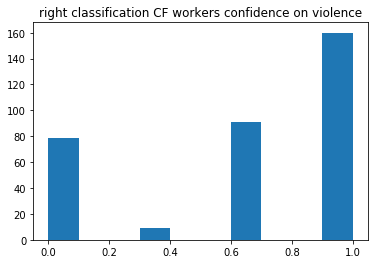

In [335]:
plt.hist(svm_results_CF_judgment_merged_righ_classification.violence_confidence)
plt.title('right classification CF workers confidence on violence')

In [336]:
svm_results_CF_judgment_merged_pos = svm_results_CF_judgment_merged_righ_classification[
    svm_results_CF_judgment_merged_righ_classification['violence'] == 1]

In [337]:
print('avg user confidence on the correctly classififed violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_pos.violence_confidence))

avg user confidence on the correctly classififed violent tweets is 0.8554033333333333


In [338]:
print('avg svm vio probability the correctly classififed violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_pos.vio_prob))

avg svm vio probability the correctly classififed violent tweets is 0.5544723684461914


In [339]:
print('avg svm nonviolence probability the correctly classififed violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_pos.non_vio_prob))

avg svm nonviolence probability the correctly classififed violent tweets is 0.4455276315538086


/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


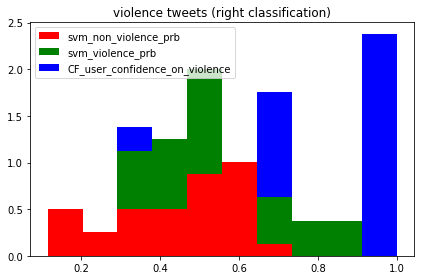

In [340]:
colors = ['red', 'green', 'blue']
labels = ['svm_non_violence_prb', 'svm_violence_prb', 'CF_user_confidence_on_violence']
plt.hist([svm_results_CF_judgment_merged_pos.non_vio_prob,
         svm_results_CF_judgment_merged_pos.vio_prob,
         svm_results_CF_judgment_merged_pos.violence_confidence],stacked=True,normed=1,
         histtype='bar',color=colors, label=labels )
plt.legend(prop={'size': 10})
plt.title('violence tweets (right classification)')
plt.tight_layout()
plt.show()

In [341]:
svm_results_CF_judgment_merged_neg = svm_results_CF_judgment_merged_righ_classification[
    svm_results_CF_judgment_merged_righ_classification['violence'] == 0]

In [342]:
print('avg user confidence on the correctly classififed non-violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_neg.violence_confidence))

avg user confidence on the correctly classififed non-violent tweets is 0.641435922330097


In [343]:
print('svm avg proability (vio) correctly classififed non-violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_neg.vio_prob))

svm avg proability (vio) correctly classififed non-violent tweets is 0.12885402085979336


In [344]:
print('svm avg proability (non-vio) correctly classififed non-violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_neg.non_vio_prob))

svm avg proability (non-vio) correctly classififed non-violent tweets is 0.8711459791402065


/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


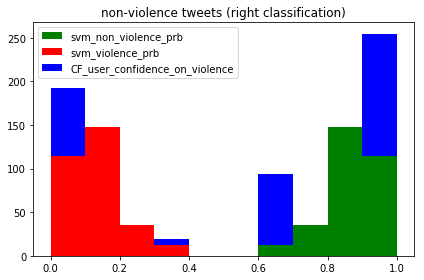

In [345]:
colors = ['green', 'red', 'blue']
labels = ['svm_non_violence_prb', 'svm_violence_prb', 'CF_user_confidence_on_violence']
plt.hist([svm_results_CF_judgment_merged_neg.non_vio_prob,
         svm_results_CF_judgment_merged_neg.vio_prob,
         svm_results_CF_judgment_merged_neg.violence_confidence],stacked=True,normed=0,
         histtype='bar',color=colors, label=labels )
plt.legend(prop={'size': 10})
plt.title('non-violence tweets (right classification)')
plt.tight_layout()
plt.show()

In [346]:
svm_results_CF_judgment_merged_mis_classification = svm_results_CF_judgment_merged[
                                                    svm_results_CF_judgment_merged['violence'] != svm_results_CF_judgment_merged['violence_prediction']
                                                    ]

In [347]:
print('avg user confidence on the mis-classififed tweets is', 
      np.mean(svm_results_CF_judgment_merged_mis_classification.violence_confidence))

avg user confidence on the mis-classififed tweets is 0.6796430555555556


In [348]:
svm_results_CF_judgment_merged_misclassififcation_pos = svm_results_CF_judgment_merged_mis_classification[
    svm_results_CF_judgment_merged_mis_classification['violence'] == 1]

In [349]:
print('avg user confidence on the mis-classififed  violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_misclassififcation_pos.violence_confidence))

avg user confidence on the mis-classififed  violent tweets is 0.7454480000000001


In [350]:
print('avg svm model probability (violent) mis-classififed  violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_misclassififcation_pos.vio_prob))

avg svm model probability (violent) mis-classififed  violent tweets is 0.1771353004756391


In [351]:
print('avg svm model probability (non violent) mis-classififed  violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_misclassififcation_pos.non_vio_prob))

avg svm model probability (non violent) mis-classififed  violent tweets is 0.8228646995243607


In [352]:
svm_results_CF_judgment_merged_misclassififcation_neg = svm_results_CF_judgment_merged_mis_classification[
    svm_results_CF_judgment_merged_mis_classification['violence'] == 0]

In [353]:
print('avg user confidence on the mis-classififed  non-violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_misclassififcation_neg.violence_confidence))

avg user confidence on the mis-classififed  non-violent tweets is 0.5300863636363636


In [354]:
print('avg svm model probability (violent) mis-classififed  non-violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_misclassififcation_neg.vio_prob))

avg svm model probability (violent) mis-classififed  non-violent tweets is 0.4979282085098822


In [355]:
print('avg svm model probability (non - violent) mis-classififed  non-violent tweets is', 
      np.mean(svm_results_CF_judgment_merged_misclassififcation_neg.non_vio_prob))

avg svm model probability (non - violent) mis-classififed  non-violent tweets is 0.5020717914901179


/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


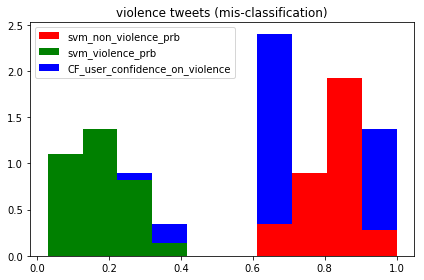

In [356]:
colors = ['red', 'green', 'blue']
labels = ['svm_non_violence_prb', 'svm_violence_prb', 'CF_user_confidence_on_violence']
plt.hist([svm_results_CF_judgment_merged_misclassififcation_pos.non_vio_prob,
         svm_results_CF_judgment_merged_misclassififcation_pos.vio_prob,
         svm_results_CF_judgment_merged_misclassififcation_pos.violence_confidence],stacked=True,normed=1,
         histtype='bar',color=colors, label=labels )
plt.legend(prop={'size': 10})
plt.title('violence tweets (mis-classification)')
plt.tight_layout()
plt.show()

/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


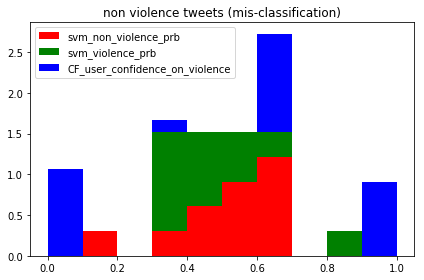

In [357]:
colors = ['red', 'green', 'blue']
labels = ['svm_non_violence_prb', 'svm_violence_prb', 'CF_user_confidence_on_violence']
plt.hist([svm_results_CF_judgment_merged_misclassififcation_neg.non_vio_prob,
         svm_results_CF_judgment_merged_misclassififcation_neg.vio_prob,
         svm_results_CF_judgment_merged_misclassififcation_neg.violence_confidence],stacked=True,normed=1,
         histtype='bar',color=colors, label=labels )
plt.legend(prop={'size': 10})
plt.title('non violence tweets (mis-classification)')
plt.tight_layout()
plt.show()